# Statistical distributions

The generation of random samples that follow a specific data distribution is very important in many fields.
This is why *ironArray* supports many of the most used statistical distributions (uniform, normal, exponential, binomial, bernoulli, poisson...).

In this tutorial, we will see how to generate random samples of these distributions using *ironArray* and we will compare them against the  *NumPy* library.

## Generating random samples

In this example, we are going to generate a random sample of the exponential distribution, whose distribution function is

$$ f(x, \lambda) = \begin{cases} \lambda e^{-\lambda x} & x \geq 0 \\ 0 & x < 0 \\ \end{cases} $$

with $\lambda = 5$.

In [1]:
import iarray as ia
import numpy as np


cfg = ia.Config(chunks=(1000, 1000), blocks=(250, 250))

x = ia.random.exponential((5000, 10000), 5, dtype=np.float64, cfg=cfg)

## Comparing against *numpy*

First, we create a random sample from the same distribution using numpy.

In [2]:
np.random.seed(123)
y = np.random.exponential(5, 5000 * 10000).reshape(5000, 10000)

Then we extract a slice from each container to work with it (the calculations
will be much faster).

In [3]:
x2 = ia.iarray2numpy( x[:500, 1000:1250]).flatten()
y2 = y[1000:1500, 3000:3250].flatten()

After that, we can visually check that the two samples come from the same distribution
by representing their histograms.

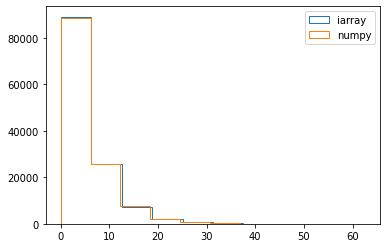

In [4]:
import matplotlib.pyplot as plt


_, _, _ = plt.hist(x2, histtype='step', label="iarray")
_, _, _ = plt.hist(y2, histtype='step', label="numpy")

plt.legend()

plt.show()

Finally, we can mathematically check that the two samples come from the same distribution
applying the Kolmogorov-Smirnov test. To apply the test, we have to assume that the two samples come
 from the same distribution.

In [5]:
from scipy.stats import kstest


statistic, pvalue = kstest(x2, y2)

print(f"D:       {statistic:.4f}")
print(f"p-value: {pvalue:.4f}")

D:       0.0042
p-value: 0.2252


As can be seen, since the p-value is very large ($>0.05$) the assumed hypothesis cannot be rejected.